In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import matplotlib.pyplot as plt


In [33]:
features_df = pd.read_csv('combined_user_features.csv')
print("Số dòng dữ liệu:", features_df.shape[0])

Số dòng dữ liệu: 25669


In [34]:
features_df.head(5)

,profile_id,in_degree,out_degree,betweenness,eigenvector,gnn_emb_0,gnn_emb_1,gnn_emb_2,gnn_emb_3,gnn_emb_4,...,gnn_emb_6,gnn_emb_7,gnn_emb_8,gnn_emb_9,gnn_emb_10,gnn_emb_11,gnn_emb_12,gnn_emb_13,gnn_emb_14,gnn_emb_15
0,14,0.018758,0.019115,0.054509,0.018762,0.089033,-0.504012,-0.756440,1.023189,-0.910011,...,-0.214209,0.353406,0.396518,-0.332800,0.467498,-0.084771,-0.045701,0.205420,-0.549647,-0.097618
1,512,0.000000,0.000354,0.000000,0.000000,0.257200,-0.727104,-1.382095,-1.238081,0.259797,...,-0.296485,0.570454,3.195334,0.228199,-0.012014,-0.849258,-0.713570,1.556980,0.676224,2.185354
2,533,0.000308,0.000354,0.000000,0.000165,0.159664,0.478681,-0.386378,-1.829643,1.325165,...,-0.972650,1.482292,0.611760,-0.229566,-0.085969,-0.623891,1.306517,-0.733281,0.275171,-1.176560
3,534,1.000000,1.000000,1.000000,1.000000,0.676236,-0.584098,1.004375,-1.393506,-0.710803,...,-0.855627,-0.075696,-1.680212,-1.009195,-1.231303,0.651602,-0.539535,0.622082,0.947859,-0.359966
4,564,0.033825,0.001062,0.002762,0.018433,0.104006,-0.047775,-0.789016,-0.035936,0.563701,...,-0.106766,0.160801,1.095453,-0.739865,0.113471,0.140059,1.041606,0.198352,-0.076664,0.540978


In [35]:
# Chọn các chỉ số mạng và một phần vector nhúng (có thể dùng toàn bộ hoặc trích chọn các chiều quan trọng)
centrality_columns = ['in_degree', 'out_degree', 'betweenness', 'eigenvector']
embedding_columns = [f'gnn_emb_{i}' for i in range(16)]  # giả sử có 16 chiều nhúng: gnn_emb_0 ... gnn_emb_15
selected_columns = centrality_columns + embedding_columns

X = features_df[selected_columns].values

In [36]:
# 5. Xác định số lượng cụm (k) bằng Silhouette Score (tùy chọn)
# ---------------------------
k_values = range(2,10)
sil_scores = []
db_scores = []
ch_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(X)
    
    # Tính Silhouette Score
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    
    # Tính Davies-Bouldin Index
    db = davies_bouldin_score(X, labels)
    db_scores.append(db)
    
    # Tính Calinski-Harabasz Score
    ch = calinski_harabasz_score(X, labels)
    ch_scores.append(ch)
    print(f"[k={k}] Silhouette Score = {sil:.4f}, Davies-Bouldin = {db:.4f}, Calinski-Harabasz Score = {ch:.4f}" )


[k=2] Silhouette Score = 0.1011, Davies-Bouldin = 2.8062, Calinski-Harabasz Score = 3034.8642
[k=3] Silhouette Score = 0.0921, Davies-Bouldin = 2.5065, Calinski-Harabasz Score = 2675.1791
[k=4] Silhouette Score = 0.0932, Davies-Bouldin = 2.3437, Calinski-Harabasz Score = 2435.6423
[k=5] Silhouette Score = 0.0896, Davies-Bouldin = 2.3507, Calinski-Harabasz Score = 2201.3873
[k=6] Silhouette Score = 0.0885, Davies-Bouldin = 2.3206, Calinski-Harabasz Score = 1978.1478
[k=7] Silhouette Score = 0.0849, Davies-Bouldin = 2.2363, Calinski-Harabasz Score = 1863.1331
[k=8] Silhouette Score = 0.0849, Davies-Bouldin = 2.1713, Calinski-Harabasz Score = 1732.9041
[k=9] Silhouette Score = 0.0835, Davies-Bouldin = 2.0811, Calinski-Harabasz Score = 1643.2979


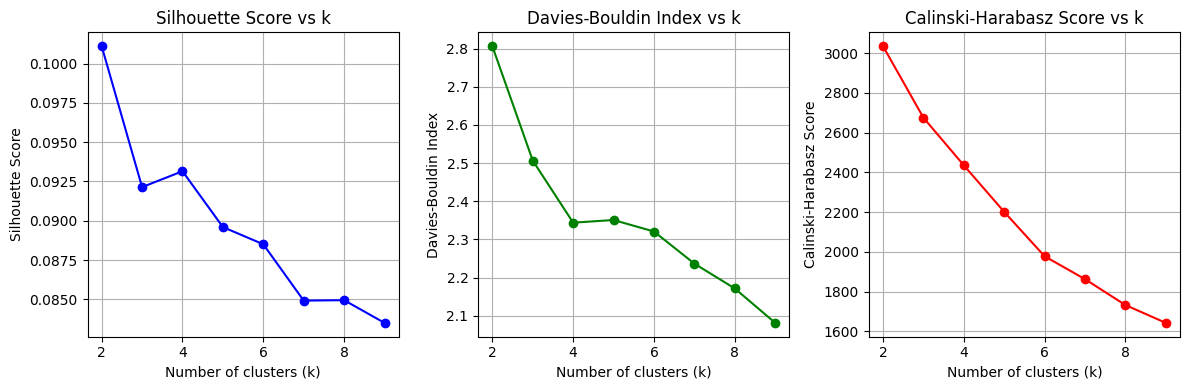

In [37]:
plt.figure(figsize=(12,4))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o', color='blue')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.grid(True)

# Davies-Bouldin Index (càng thấp càng tốt)
plt.subplot(1, 3, 2)
plt.plot(k_values, db_scores, marker='o', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs k")
plt.grid(True)

# Calinski-Harabasz Score (càng cao càng tốt)
plt.subplot(1, 3, 3)
plt.plot(k_values, ch_scores, marker='o', color='red')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs k")
plt.grid(True)

plt.tight_layout()
plt.show()

In [45]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features_df['cluster'] = kmeans.fit(X)

In [46]:
features_df.head()

,profile_id,in_degree,out_degree,betweenness,eigenvector,gnn_emb_0,gnn_emb_1,gnn_emb_2,gnn_emb_3,gnn_emb_4,...,gnn_emb_8,gnn_emb_9,gnn_emb_10,gnn_emb_11,gnn_emb_12,gnn_emb_13,gnn_emb_14,gnn_emb_15,cluster,role
0,14,0.018758,0.019115,0.054509,0.018762,0.089033,-0.504012,-0.756440,1.023189,-0.910011,...,0.396518,-0.332800,0.467498,-0.084771,-0.045701,0.205420,-0.549647,-0.097618,"KMeans(n_clusters=4, random_state=42)",NaN
1,512,0.000000,0.000354,0.000000,0.000000,0.257200,-0.727104,-1.382095,-1.238081,0.259797,...,3.195334,0.228199,-0.012014,-0.849258,-0.713570,1.556980,0.676224,2.185354,"KMeans(n_clusters=4, random_state=42)",NaN
2,533,0.000308,0.000354,0.000000,0.000165,0.159664,0.478681,-0.386378,-1.829643,1.325165,...,0.611760,-0.229566,-0.085969,-0.623891,1.306517,-0.733281,0.275171,-1.176560,"KMeans(n_clusters=4, random_state=42)",NaN
3,534,1.000000,1.000000,1.000000,1.000000,0.676236,-0.584098,1.004375,-1.393506,-0.710803,...,-1.680212,-1.009195,-1.231303,0.651602,-0.539535,0.622082,0.947859,-0.359966,"KMeans(n_clusters=4, random_state=42)",NaN
4,564,0.033825,0.001062,0.002762,0.018433,0.104006,-0.047775,-0.789016,-0.035936,0.563701,...,1.095453,-0.739865,0.113471,0.140059,1.041606,0.198352,-0.076664,0.540978,"KMeans(n_clusters=4, random_state=42)",NaN


In [47]:
# 6. Kiểm tra trung tâm các cụm để xem đặc trưng nào nổi bật
# ---------------------------
cluster_centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(cluster_centers, columns=selected_columns)
print("Trung tâm các cụm:")
print(centers_df)

Trung tâm các cụm:
   in_degree  out_degree  betweenness  eigenvector  gnn_emb_0  gnn_emb_1  \
0   0.000426    0.000580     0.000144     0.000333   0.358788   0.498709   
1   0.000461    0.000578     0.000200     0.000351   0.612012  -0.848710   
2   0.000649    0.000742     0.000241     0.000528  -0.605979   0.442550   
3   0.000956    0.000992     0.000588     0.000809  -0.065016  -0.330347   

   gnn_emb_2  gnn_emb_3  gnn_emb_4  gnn_emb_5  gnn_emb_6  gnn_emb_7  \
0   0.865856  -0.185929   0.796380   0.297951  -0.425343  -0.518690   
1  -0.268067   0.034899   0.094641  -0.435940  -0.529774  -0.129573   
2   0.100126   0.440780  -0.113208  -0.256374   0.669486  -0.278224   
3  -0.690866  -0.381213  -0.649526   0.364889  -0.012472   0.890355   

   gnn_emb_8  gnn_emb_9  gnn_emb_10  gnn_emb_11  gnn_emb_12  gnn_emb_13  \
0  -0.128682   0.371903    0.408356    0.156439    0.179675   -0.985595   
1   1.031342   0.086624    0.163455   -0.882606   -0.837298    0.125237   
2  -0.419872  -0.62

<Figure size 1400x600 with 0 Axes>

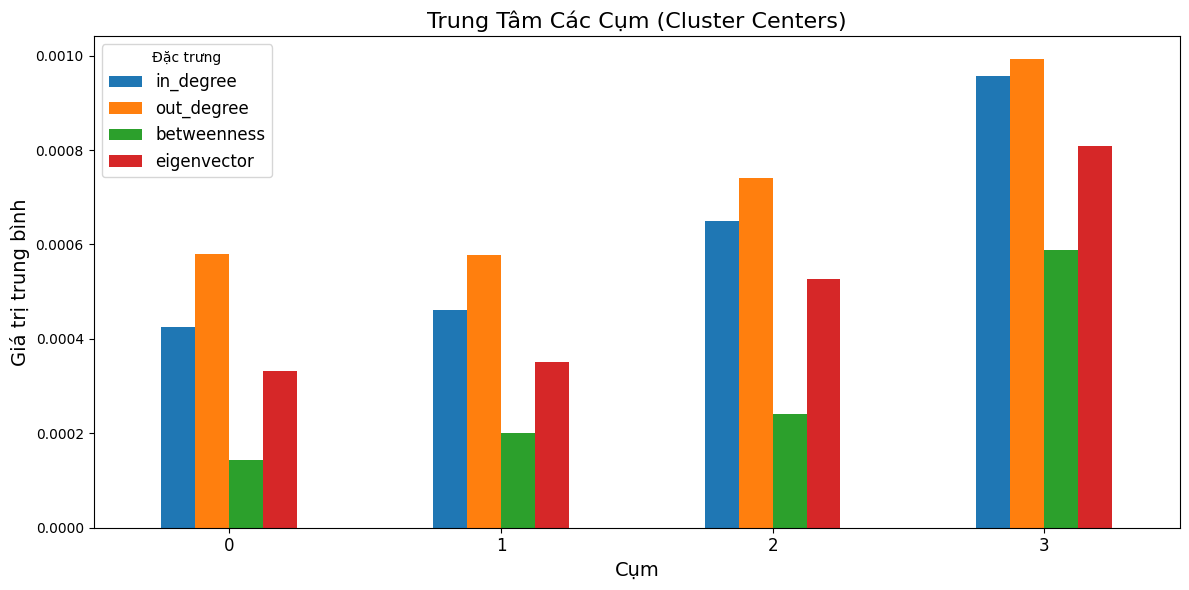

In [48]:
center_label = pd.DataFrame(centers_df.iloc[:, :4])
plt.figure(figsize=(14, 6))
center_label.plot(kind="bar", figsize=(12, 6))

# Đặt tiêu đề và nhãn
plt.title("Trung Tâm Các Cụm (Cluster Centers)", fontsize=16)
plt.xlabel("Cụm", fontsize=14)
plt.ylabel("Giá trị trung bình", fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Hiển thị tên cụm
plt.legend(title="Đặc trưng", fontsize=12)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [42]:
role_map = {
    0: 'Influencers',
    1: 'Active Followers',
    2: 'Community Leaders',
    3: 'Lurkers',
    # 4: 'Bridge Builders'
}

features_df['role'] = features_df['cluster'].map(role_map)

In [43]:
features_df.to_csv('user_roles_clustered.csv', index=False)
print("Đã lưu kết quả phân cụm và gán nhãn vai trò vào file 'user_roles_clustered.csv'")
print("Phân bố các vai trò:")
print(features_df['role'].value_counts())

Đã lưu kết quả phân cụm và gán nhãn vai trò vào file 'user_roles_clustered.csv'
Phân bố các vai trò:
Series([], Name: count, dtype: int64)
